In [20]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [83]:
mnist = tf.keras.datasets.mnist

In [90]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [91]:
x_train.shape

(60000, 28, 28)

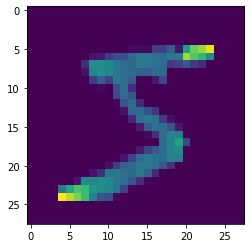

In [92]:
imshow(x_train[0])

In [6]:
model = tf.keras.models.Sequential()

In [7]:
model.add(tf.keras.layers.Flatten())

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
y = model.fit(x_train,y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 19.8234 - accuracy: 0.0000e+00


In [3]:
def load_reg_data():
    # load the regression synthetic data
    #torch.manual_seed(0) # force seed so same data is generated every time
    np.random.seed(0)
    X = np.linspace(0, 4, 100).reshape(-1, 1)
    noise = np.random.normal(0, .4, size=X.shape)
    w = 0.5
    b = 1.
    Y = w * X**2 + b + noise

    return X, Y

In [4]:
x,y = load_reg_data()

In [5]:
x.shape,y.shape

((100, 1), (100, 1))

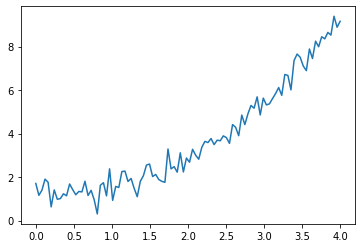

In [6]:
plot(x,y)

In [7]:
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [8]:
model.compile(loss='mean_squared_error',optimizer = tf.keras.optimizers.Adam(0.1))

In [81]:
model.fit(x,y,epochs=100)

Epoch 1/100


ValueError: in user code:

    /home/yang158/pythonenvs/py3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/yang158/pythonenvs/py3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/yang158/pythonenvs/py3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/yang158/pythonenvs/py3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/yang158/pythonenvs/py3.8/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/yang158/pythonenvs/py3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/yang158/pythonenvs/py3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/yang158/pythonenvs/py3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/yang158/pythonenvs/py3.8/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected axis -1 of input shape to have value 8 but received input with shape (None, 28, 28, 1)


In [10]:
pred = []
for val in x:
    pred.append(model.predict([val])) #[model.predict([val])]

Consider rewriting this model with the Functional API.


In [11]:
ref = model.predict(x)

In [12]:
#pred= array(pred)
pred = array(pred).reshape(100,1)

In [13]:
pred.shape

(100, 1)

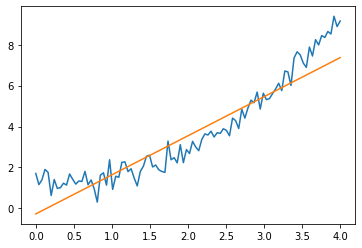

In [14]:
plot(x,y)
plot(x,pred)

In [15]:
np.allclose(ref,pred)

True

## Add more layers

In [27]:
from tensorflow.keras.layers import Dense

In [28]:
model = tf.keras.models.Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

In [29]:
model.compile(loss='mean_squared_error',optimizer = tf.keras.optimizers.Adam(0.1))

In [30]:
model.fit(x,y,epochs=100,verbose=False)

In [31]:
ref = model.predict(x)

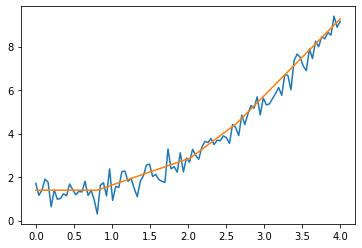

In [33]:
plot(x,y)
plot(x,ref)

In [35]:
model.evaluate(x,y)

4/4 [==============================] - 0s 1ms/step - loss: 0.1620


0.1619596928358078

## Multi_feature regression

In [38]:
dataset = loadtxt('pima-indians-diabetes.data.csv',delimiter=',')

In [39]:
X = dataset[:,:8]
Y = dataset[:,8]

In [52]:
model = tf.keras.models.Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [53]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.fit(X,Y,epochs=150,batch_size=10,verbose=0)

In [55]:
pred = model.predict(X)

In [56]:
X.shape

(768, 8)

In [57]:
pred.shape

(768, 1)

In [63]:
plot((pred))
plot(Y)

TypeError: type numpy.ndarray doesn't define __round__ method

In [60]:
model.evaluate(X,Y)

24/24 [==============================] - 0s 529us/step - loss: 0.4374 - accuracy: 0.7995


[0.4374291002750397, 0.7994791865348816]

## CNN regression

In [64]:
from sklearn.datasets import load_boston

In [65]:
boston=load_boston()
x,y = boston.data,boston.target

In [67]:
x.shape,y.shape

((506, 13), (506,))

In [74]:
input_shape = (4,28,28,1)##batch_size, row, column, channel
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(5,(3,3),activation='relu',input_shape=(28,28,1))(x)

In [75]:
y.shape

TensorShape([4, 26, 26, 5])

In [77]:
pool = tf.keras.layers.MaxPooling2D((2,2))

In [79]:
pool(y).shape

TensorShape([4, 13, 13, 5])